# Pandas Exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
df = pd.read_csv('C:/Users/cyisc/Desktop/8-pandas-exploration-cyischristy/data/NYPD_Arrest.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  

Feel free to add as many additional cells as you need to help explain the raw data.

- Show 5 rows, selected at random, from the data set.

In [4]:
random_rows = df.sample(5)
print(random_rows)

       ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
761     279895716  01/03/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
27670   282092551  02/12/2024  478.0  THEFT OF SERVICES, UNCLASSIFIE  343.0   
31005   282397724  02/18/2024  268.0              CRIMINAL MIS 2 & 3  121.0   
8984    281987798  02/10/2024  922.0  TRAFFIC,UNCLASSIFIED MISDEMEAN  348.0   
38540   282344594  02/16/2024  779.0  PUBLIC ADMINISTRATION,UNCLASSI  126.0   

                            OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
761                    FELONY ASSAULT  PL 1200502          F           B   
27670  OTHER OFFENSES RELATED TO THEF  PL 1651503          M           K   
31005  CRIMINAL MISCHIEF & RELATED OF  PL 1450502          F           M   
8984         VEHICLE AND TRAFFIC LAWS  VTL0511001          M           K   
38540         MISCELLANEOUS PENAL LAW  PL 215510B          F           Q   

       ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       P

- Show each of the column names and their data types.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

- Show any unique features of your chosen data set.

Coloumn #18 is the combination of coloumn #16 Latitude and coloumn #17 Lontitude in the format (Longtitude, Latitude), in this way, people can visualize this two columns more clearly and easily. (Show last three coloumns for ramdonly 5 rows from the data set.)

In [6]:
random_sample = df.iloc[:, [16, 17, 18]].sample(5)
print(random_sample)

        Latitude  Longitude                       New Georeferenced Column
49228  40.636391 -73.985318                   POINT (-73.985318 40.636391)
15221  40.804344 -73.921570   POINT (-73.92157034291316 40.80434411813664)
13955  40.715466 -73.995632   POINT (-73.99563157321111 40.71546572952549)
24669  40.779159 -73.954784                   POINT (-73.954784 40.779159)
52194  40.654840 -73.959696  POINT (-73.95969634660908 40.654840476104035)


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

- 1. Delete **X_COORD_CD** and **Y_COORD_CD** two columns inside the dataset since these two numbers indicates the exact arrest location which can be showed more scientifically by the combination of **Latitude** and **Longtitude**, therefore we can delete these two columns to simplify the dataset.

In [7]:
df.drop(columns=['X_COORD_CD', 'Y_COORD_CD'], inplace=True)
print(df.sample(5))

       ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
14665   280082294  01/06/2024  101.0                       ASSAULT 3  344.0   
4026    280329365  01/11/2024  478.0  THEFT OF SERVICES, UNCLASSIFIE  343.0   
41547   282294017  02/15/2024  750.0                RESISTING ARREST  359.0   
53757   283985946  03/19/2024  268.0              CRIMINAL MIS 2 & 3  121.0   
30357   282533906  02/20/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   

                            OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
14665    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
4026   OTHER OFFENSES RELATED TO THEF  PL 1651503          M           M   
41547  OFFENSES AGAINST PUBLIC ADMINI  PL 2053000          M           B   
53757  CRIMINAL MISCHIEF & RELATED OF  PL 1450502          F           Q   
30357                  FELONY ASSAULT  PL 1200512          F           M   

       ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX  \
1466

- 2. Delete all rows that contain null values since these rows missing important information so it is meaningless to include them in the later analysis part.

In [8]:
df.dropna(inplace=True)
print(df.sample(5))

       ARREST_KEY ARREST_DATE  PD_CD  \
37829   281865043  02/08/2024  922.0   
5501    280441774  01/13/2024  439.0   
23902   282750134  02/25/2024  109.0   
8758    280160511  01/08/2024  339.0   
33989   282313102  02/16/2024  101.0   

                                         PD_DESC  KY_CD  \
37829             TRAFFIC,UNCLASSIFIED MISDEMEAN  348.0   
5501   LARCENY,GRAND FROM OPEN AREAS, UNATTENDED  109.0   
23902                   ASSAULT 2,1,UNCLASSIFIED  106.0   
8758              LARCENY,PETIT FROM OPEN AREAS,  341.0   
33989                                  ASSAULT 3  344.0   

                          OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
37829      VEHICLE AND TRAFFIC LAWS  VTL05110MU          M           Q   
5501                  GRAND LARCENY  PL 1553001          F           Q   
23902                FELONY ASSAULT  PL 1200502          F           M   
8758                  PETIT LARCENY  PL 1552500          M           B   
33989  ASSAULT 3 & RELATED OFFENSE

- 3. Delete **Jurisdiction_Code** column to simplify the dataset since we don't need to use it in later analysis.

In [9]:
df.drop(columns=['JURISDICTION_CODE'], inplace=True)
print(df.sample(5))

       ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
477     280540262  01/15/2024  105.0               STRANGULATION 1ST  106.0   
4970    281429397  01/31/2024  729.0  FORGERY,ETC.,UNCLASSIFIED-FELO  113.0   
35091   281535420  02/01/2024  106.0    ASSAULT POLICE/PEACE OFFICER  106.0   
11724   279786338  01/01/2024  106.0    ASSAULT POLICE/PEACE OFFICER  106.0   
58811   284291364  03/25/2024  639.0         AGGRAVATED HARASSMENT 2  361.0   

                           OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
477                   FELONY ASSAULT  PL 1211300          F           Q   
4970                         FORGERY  PL 1702500          F           M   
35091                 FELONY ASSAULT  PL 1200800          F           M   
11724                 FELONY ASSAULT  PL 1200503          F           M   
58811  OFF. AGNST PUB ORD SENSBLTY &  PL 2403001          M           Q   

       ARREST_PRECINCT AGE_GROUP PERP_SEX       PERP_RACE   Latitude  \
47

- 4. Delete **New Georeferenced Column** column to simplify the dataset since it is the simple combination version of column **Latitude** and **Longtitude** which therefore don't provide any extra information. And since this object column can't be analyzed as easy as column **Latitude** and **Longtitude** which are all columns with pure floats, we choose to delete this column from the later analysis.

In [10]:
df.drop(columns=['New Georeferenced Column'], inplace=True)
print(df.sample(5))

       ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
41815   281746126  02/06/2024  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
24854   281932785  02/09/2024  922.0  TRAFFIC,UNCLASSIFIED MISDEMEAN  348.0   
33688   282600159  02/22/2024  729.0  FORGERY,ETC.,UNCLASSIFIED-FELO  113.0   
16814   280483783  01/13/2024  750.0                RESISTING ARREST  359.0   
51523   283282075  03/06/2024  503.0  CONTROLLED SUBSTANCE,INTENT TO  117.0   

                            OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
41815                  FELONY ASSAULT  PL 1200513          F           Q   
24854        VEHICLE AND TRAFFIC LAWS  VTL05110MU          M           K   
33688                         FORGERY  PL 1702500          F           M   
16814  OFFENSES AGAINST PUBLIC ADMINI  PL 2053000          M           K   
51523                 DANGEROUS DRUGS  PL 2201602          F           B   

       ARREST_PRECINCT AGE_GROUP PERP_SEX       PERP_RACE   Latitude

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

- 1. Count the number of offence occurrences of each race in the whole dataset based on column **PERP_RACE** and then display the counts grouped by race.

In [11]:
race_counts = df['PERP_RACE'].value_counts()
print(race_counts)

PERP_RACE
BLACK                             29318
WHITE HISPANIC                    17075
WHITE                              6564
BLACK HISPANIC                     6274
ASIAN / PACIFIC ISLANDER           3506
UNKNOWN                             289
AMERICAN INDIAN/ALASKAN NATIVE      184
Name: count, dtype: int64


- 2. Count the number of offence occurrences of each gender in the whole dataset based on column **PERP_SEX** and then display the counts grouped by gender.

In [12]:
gender_counts = df['PERP_SEX'].value_counts()
print(gender_counts)

PERP_SEX
M    52068
F    11142
Name: count, dtype: int64


- 3. Count the number of offence occurrences based on the type of offence in the whole dataset according to the column **KY_CD**, then sort the counts based on the frenquency value of the count, and finally diplay it. In this way, we can know which kind of offence reason appears the most and which appears the least.

In [13]:
key_code_counts = df['KY_CD'].value_counts()
sorted_by_frequency = key_code_counts.sort_values(ascending=False)
print(sorted_by_frequency)

KY_CD
344.0    8960
341.0    6526
106.0    5288
126.0    3945
348.0    3923
         ... 
237.0       3
354.0       2
102.0       2
685.0       1
357.0       1
Name: count, Length: 65, dtype: int64


- 4. Count the number of offence occurrences based on percinct in the whole dataset according to the column **ARREST_PRECINCT**, then sort the counts based on the frenquency value of the count, and finally diplay it. In this way, we can know which percinct has the most offense happened and which has the least. 

In [14]:
precinct_counts = df['ARREST_PRECINCT'].value_counts()
sorted_by_frequency = precinct_counts.sort_values(ascending=False)
print(sorted_by_frequency)

ARREST_PRECINCT
14     2502
75     2075
40     1933
44     1927
103    1896
       ... 
123     305
100     299
20      257
111     193
22       14
Name: count, Length: 77, dtype: int64


- 5. Sort the entire dataset in the ascending order based on the **ARREST_KEY** column.

In [15]:
df_sorted = df.sort_values(by='ARREST_KEY', ascending=True)
print(df_sorted.head())

       ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
10464   279763507  01/01/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
9684    279763792  01/01/2024  792.0      CRIMINAL POSSESSION WEAPON  118.0   
8477    279763800  01/01/2024  101.0                       ASSAULT 3  344.0   
13247   279764505  01/01/2024  511.0  CONTROLLED SUBSTANCE, POSSESSI  235.0   
10155   279764507  01/01/2024  792.0      CRIMINAL POSSESSION WEAPON  118.0   

                          OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
10464               DANGEROUS DRUGS  PL 2200300          M           K   
9684              DANGEROUS WEAPONS  PL 265031B          F           B   
8477   ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   
13247               DANGEROUS DRUGS  PL 2200300          M           B   
10155             DANGEROUS WEAPONS  PL 265031B          F           K   

       ARREST_PRECINCT AGE_GROUP PERP_SEX       PERP_RACE   Latitude  \
10464   

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

- 1. Distribution of arrests by borough using Bar Chart, according to **ARREST_BORO** column.

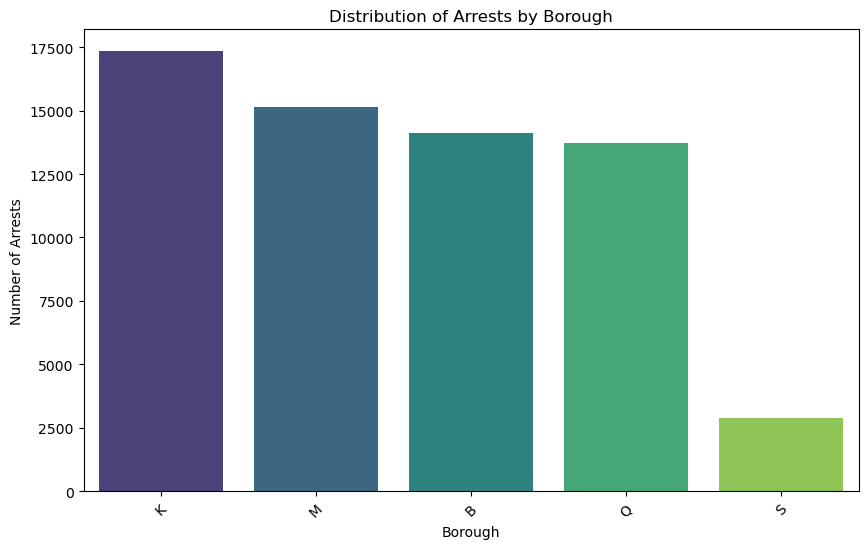

In [22]:
arrests_by_borough = df['ARREST_BORO'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=arrests_by_borough.index, y=arrests_by_borough.values, palette='viridis')
plt.title('Distribution of Arrests by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()

- 2. Age distribution of perpetrators using Histogram, according to **AGE_GROUP** column.

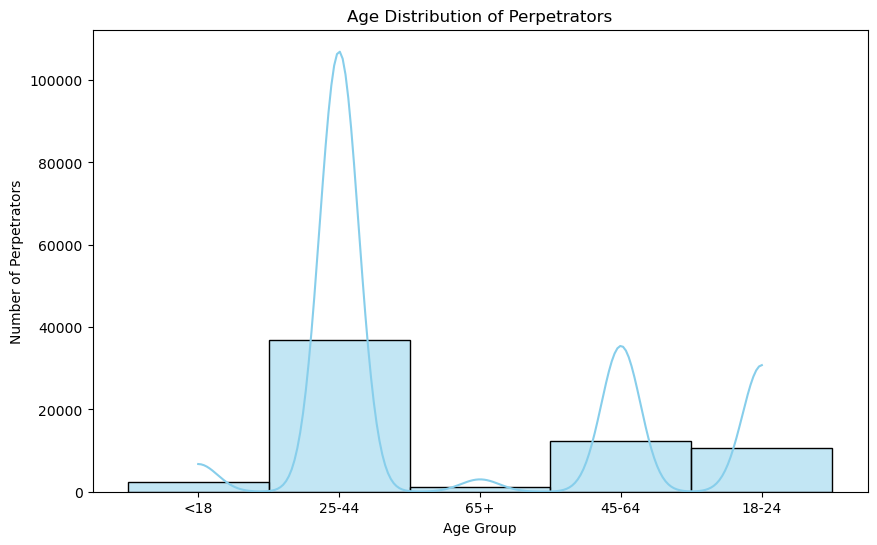

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE_GROUP'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Perpetrators')
plt.xlabel('Age Group')
plt.ylabel('Number of Perpetrators')
plt.show()

- 3. Trend of arrests over time using Line Chart, based on **ARREST_DATE** column.

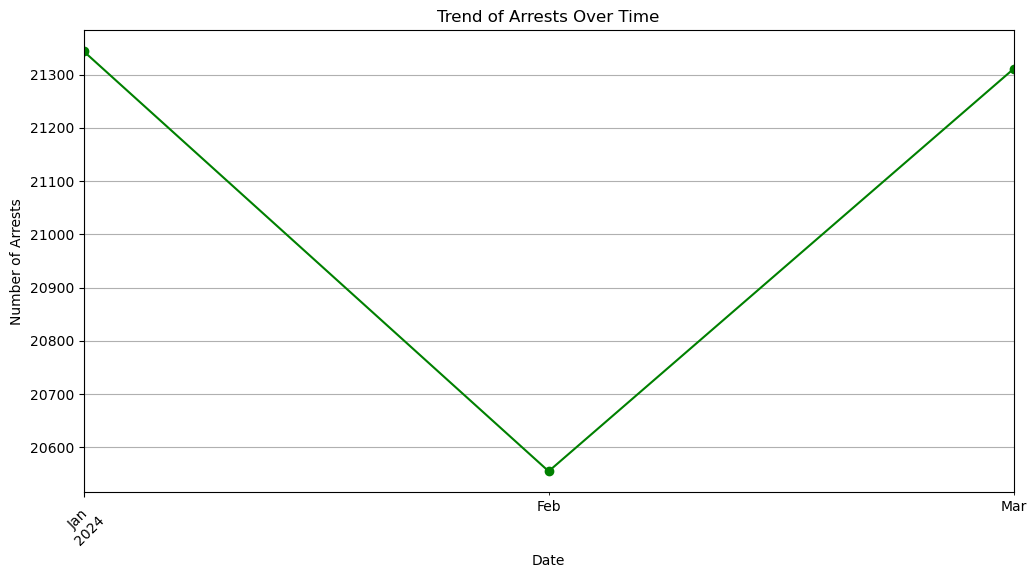

In [24]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
arrests_over_time = df.groupby(df['ARREST_DATE'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
arrests_over_time.plot(marker='o', color='green')
plt.title('Trend of Arrests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 4. Pie chart of arrests by race using Pie Chart, according to **PERP_RACE** column.

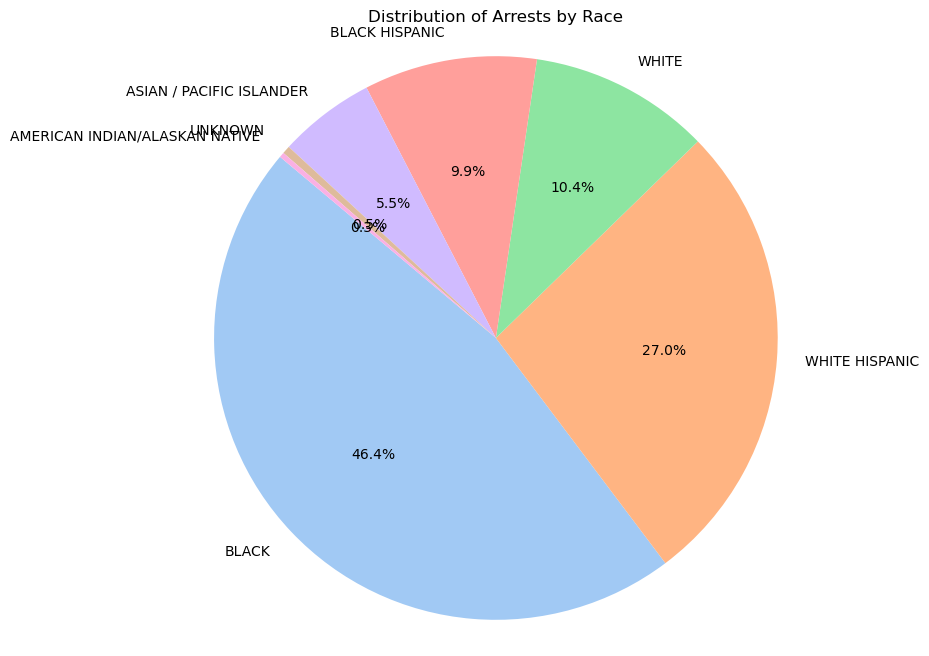

In [26]:
arrests_by_race = df['PERP_RACE'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(arrests_by_race, labels=arrests_by_race.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Arrests by Race')
plt.axis('equal')
plt.show()

- 5. Stacked bar chart of arrests by gender and age group using Stacked Bar Chart, based on **PERP_SEX** and **AGE_GROUP** column.

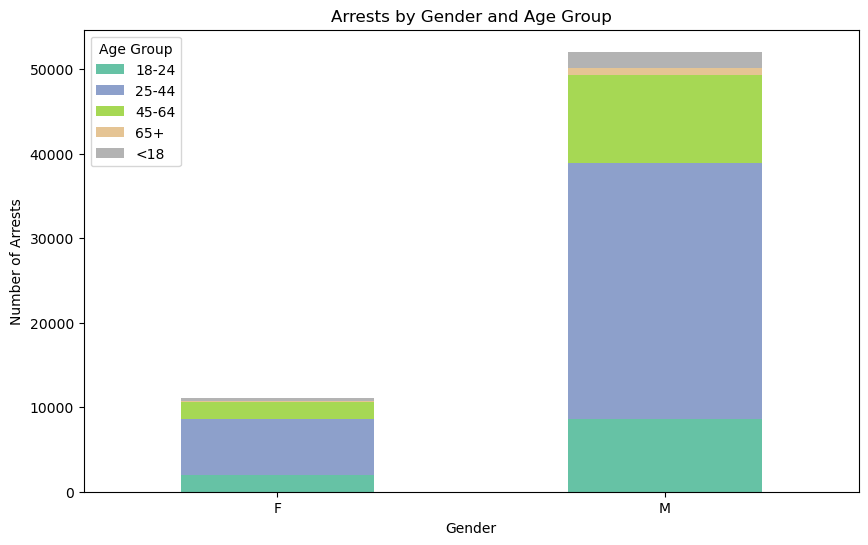

In [27]:
arrests_by_gender_age = df.groupby(['PERP_SEX', 'AGE_GROUP']).size().unstack()
arrests_by_gender_age.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Arrests by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()